In [ ]:
import pandas as pd

# Caminho para o arquivo CSV
arquivo = 'data/inmet/dados_A001_D_2000-05-06_2024-08-27.csv'

# Dicionário para armazenar os metadados
metadados = {}

# Lista de metadados a serem mantidos
metadados_mantidos = ['Nome', 'Codigo Estacao', 'Latitude', 'Longitude', 'Altitude']

# Lê os metadados (primeiras 9 linhas)
with open(arquivo, 'r', encoding='utf-8') as f:
    for _ in range(9):
        linha = f.readline().strip().split(': ')
        if len(linha) == 2:
            chave, valor = linha
            if chave in metadados_mantidos:
                metadados[chave] = valor

# Lê o CSV principal, pulando as 10 primeiras linhas (9 de metadados + 1 linha em branco)
df = pd.read_csv(arquivo, skiprows=10, sep=';')

# Remove a coluna 'Unnamed: 11' se ela existir
if 'Unnamed: 11' in df.columns:
    df = df.drop('Unnamed: 11', axis=1)

# Adiciona os metadados selecionados como colunas no DataFrame
for chave, valor in metadados.items():
    df[chave] = valor

# Converte Latitude, Longitude e Altitude para números
df['Latitude'] = pd.to_numeric(metadados['Latitude'])
df['Longitude'] = pd.to_numeric(metadados['Longitude'])
df['Altitude'] = pd.to_numeric(metadados['Altitude'])

# Converte a coluna de data para datetime
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

# Exibe as primeiras linhas do DataFrame
print(df.head())

# Exibe informações sobre o DataFrame
print(df.info())

# Exibe os metadados incluídos
print("\nMetadados incluídos:")
for chave, valor in metadados.items():
    print(f"{chave}: {valor}")

In [ ]:
df.head()

In [15]:
import pandas as pd
import os
import glob

# Diretório contendo os arquivos CSV
diretorio = 'data/inmet/'

# Lista para armazenar os DataFrames de cada arquivo
dfs = []

# Lista de metadados a serem mantidos
metadados_mantidos = ['Nome', 'Codigo Estacao', 'Latitude', 'Longitude', 'Altitude']

# Função para processar um único arquivo CSV
def processar_arquivo(arquivo):
    metadados = {}
    
    # Lê os metadados (primeiras 9 linhas)
    with open(arquivo, 'r', encoding='utf-8') as f:
        for _ in range(9):
            linha = f.readline().strip().split(': ')
            if len(linha) == 2:
                chave, valor = linha
                if chave in metadados_mantidos:
                    metadados[chave] = valor
    
    # Lê o CSV principal, pulando as 10 primeiras linhas
    df = pd.read_csv(arquivo, skiprows=10, sep=';')
    
    # Remove a coluna 'Unnamed: 11' se ela existir
    if 'Unnamed: 11' in df.columns:
        df = df.drop('Unnamed: 11', axis=1)
    
    # Adiciona os metadados selecionados como colunas no DataFrame
    for chave, valor in metadados.items():
        df[chave] = valor
    
    # Converte Latitude, Longitude e Altitude para números
    for col in ['Latitude', 'Longitude', 'Altitude']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col])
    
    # Converte a coluna de data para datetime
    df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
    
    return df

# Processa todos os arquivos CSV no diretório
for arquivo in glob.glob(os.path.join(diretorio, '*.csv')):
    print(f"Processando arquivo: {arquivo}")
    df = processar_arquivo(arquivo)
    dfs.append(df)

# Combina todos os DataFrames em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Exibe as primeiras linhas do DataFrame final
print("\nPrimeiras linhas do DataFrame final:")
print(df_final.head())

# Exibe informações sobre o DataFrame final
print("\nInformações do DataFrame final:")
print(df_final.info())

# Salva o DataFrame final em um novo arquivo CSV
# df_final.to_csv('dados_combinados_inmet.csv', index=False)
# print("\nDados combinados salvos em 'dados_combinados_inmet.csv'")

Processando arquivo: data/inmet\dados_A001_D_2000-05-06_2024-08-27.csv
Processando arquivo: data/inmet\dados_A002_D_2001-05-28_2024-08-27.csv
Processando arquivo: data/inmet\dados_A003_D_2001-05-24_2024-08-27.csv
Processando arquivo: data/inmet\dados_A004_D_2001-05-30_2018-06-20.csv
Processando arquivo: data/inmet\dados_A005_D_2001-06-03_2024-08-27.csv
Processando arquivo: data/inmet\dados_A006_D_2001-06-07_2006-09-24.csv
Processando arquivo: data/inmet\dados_A007_D_2003-02-19_2005-08-15.csv
Processando arquivo: data/inmet\dados_A008_D_2003-06-12_2013-02-19.csv
Processando arquivo: data/inmet\dados_A009_D_2004-12-16_2024-08-27.csv
Processando arquivo: data/inmet\dados_A010_D_2005-03-03_2024-08-27.csv
Processando arquivo: data/inmet\dados_A011_D_2006-07-14_2024-08-27.csv
Processando arquivo: data/inmet\dados_A012_D_2006-10-20_2024-08-27.csv
Processando arquivo: data/inmet\dados_A013_D_2007-07-12_2024-08-27.csv
Processando arquivo: data/inmet\dados_A014_D_2007-07-17_2024-08-27.csv
Proces

In [18]:
df_final.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Nome,Codigo Estacao,Latitude,Longitude,Altitude
0,2000-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRASILIA,A001,-15.789444,-47.925833,1160.96
1,2000-05-07,NaN,NaN,NaN,NaN,NaN,NaN,49.2,36.0,6.3,NaN,BRASILIA,A001,-15.789444,-47.925833,1160.96
2,2000-05-08,0.0,888.1,13.5,28.2,22.1,16.5,60.3,33.0,7.1,2.1,BRASILIA,A001,-15.789444,-47.925833,1160.96
3,2000-05-09,0.0,888.1,13.3,28.7,22.1,16.6,58.8,37.0,7.0,1.2,BRASILIA,A001,-15.789444,-47.925833,1160.96
4,2000-05-10,0.0,889.0,14.4,28.9,22.4,17.7,62.1,35.0,6.3,2.1,BRASILIA,A001,-15.789444,-47.925833,1160.96


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293052 entries, 0 to 3293051
Data columns (total 16 columns):
 #   Column                                                  Dtype         
---  ------                                                  -----         
 0   Data Medicao                                            datetime64[ns]
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    float64       
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              float64       
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  float64       
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    float64       
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     float64       
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    float64       
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           float64       
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)          float64       
 9   VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)        

In [21]:
df_final.columns

Index(['Data Medicao', 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
       'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
       'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
       'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
       'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
       'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
       'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
       'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
       'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
       'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', 'Nome', 'Codigo Estacao',
       'Latitude', 'Longitude', 'Altitude'],
      dtype='object')

In [22]:
import pandas as pd
import os
import glob

# Diretório contendo os arquivos CSV
diretorio = 'data/inmet/'

# Lista para armazenar os DataFrames de cada arquivo
dfs = []

# Lista de metadados a serem mantidos
metadados_mantidos = ['Nome', 'Codigo Estacao', 'Latitude', 'Longitude', 'Altitude']

# Dicionário para renomear as colunas
colunas_renomeadas = {
    'Data Medicao': 'data',
    'Nome': 'nome',
    'Codigo Estacao': 'codigo_estacao',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Altitude': 'altitude',
    'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'precipitacao_total',
    'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)': 'pressao_atmosferica_media',
    'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)': 'temperatura_orvalho_media',
    'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)': 'temperatura_maxima',
    'TEMPERATURA MEDIA, DIARIA (AUT)(°C)': 'temperatura_media',
    'TEMPERATURA MINIMA, DIARIA (AUT)(°C)': 'temperatura_minima',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)': 'umidade_relativa_media',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)': 'umidade_relativa_minima',
    'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)': 'vento_rajada_maxima',
    'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)': 'vento_velocidade_media'
}

# Função para processar um único arquivo CSV
def processar_arquivo(arquivo):
    metadados = {}
    
    # Lê os metadados (primeiras 9 linhas)
    with open(arquivo, 'r', encoding='utf-8') as f:
        for _ in range(9):
            linha = f.readline().strip().split(': ')
            if len(linha) == 2:
                chave, valor = linha
                if chave in metadados_mantidos:
                    metadados[chave] = valor
    
    # Lê o CSV principal, pulando as 10 primeiras linhas
    df = pd.read_csv(arquivo, skiprows=10, sep=';')
    
    # Remove a coluna 'Unnamed: 11' se ela existir
    if 'Unnamed: 11' in df.columns:
        df = df.drop('Unnamed: 11', axis=1)
    
    # Adiciona os metadados selecionados como colunas no DataFrame
    for chave, valor in metadados.items():
        df[chave] = valor
    
    # Converte Latitude, Longitude e Altitude para números
    for col in ['Latitude', 'Longitude', 'Altitude']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col])
    
    # Converte a coluna de data para datetime
    df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
    
    return df

# Processa todos os arquivos CSV no diretório
for arquivo in glob.glob(os.path.join(diretorio, '*.csv')):
    print(f"Processando arquivo: {arquivo}")
    df = processar_arquivo(arquivo)
    dfs.append(df)

# Combina todos os DataFrames em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Renomeia as colunas
df_final = df_final.rename(columns=colunas_renomeadas)

# Reordena as colunas
colunas_ordem = ['data', 'nome', 'codigo_estacao', 'latitude', 'longitude', 'altitude'] + \
                [col for col in df_final.columns if col not in ['data', 'nome', 'codigo_estacao', 'latitude', 'longitude', 'altitude']]
df_final = df_final[colunas_ordem]

# Exibe as primeiras linhas do DataFrame final
print("\nPrimeiras linhas do DataFrame final:")
print(df_final.head())

# Exibe informações sobre o DataFrame final
print("\nInformações do DataFrame final:")
print(df_final.info())

# Salva o DataFrame final em um novo arquivo CSV
# df_final.to_csv('dados_combinados_inmet_formatados.csv', index=False)
# print("\nDados combinados e formatados salvos em 'dados_combinados_inmet_formatados.csv'")

Processando arquivo: data/inmet\dados_A001_D_2000-05-06_2024-08-27.csv
Processando arquivo: data/inmet\dados_A002_D_2001-05-28_2024-08-27.csv
Processando arquivo: data/inmet\dados_A003_D_2001-05-24_2024-08-27.csv
Processando arquivo: data/inmet\dados_A004_D_2001-05-30_2018-06-20.csv
Processando arquivo: data/inmet\dados_A005_D_2001-06-03_2024-08-27.csv
Processando arquivo: data/inmet\dados_A006_D_2001-06-07_2006-09-24.csv
Processando arquivo: data/inmet\dados_A007_D_2003-02-19_2005-08-15.csv
Processando arquivo: data/inmet\dados_A008_D_2003-06-12_2013-02-19.csv
Processando arquivo: data/inmet\dados_A009_D_2004-12-16_2024-08-27.csv
Processando arquivo: data/inmet\dados_A010_D_2005-03-03_2024-08-27.csv
Processando arquivo: data/inmet\dados_A011_D_2006-07-14_2024-08-27.csv
Processando arquivo: data/inmet\dados_A012_D_2006-10-20_2024-08-27.csv
Processando arquivo: data/inmet\dados_A013_D_2007-07-12_2024-08-27.csv
Processando arquivo: data/inmet\dados_A014_D_2007-07-17_2024-08-27.csv
Proces

In [23]:
df_final.head()

,data,nome,codigo_estacao,latitude,longitude,altitude,precipitacao_total,pressao_atmosferica_media,temperatura_orvalho_media,temperatura_maxima,temperatura_media,temperatura_minima,umidade_relativa_media,umidade_relativa_minima,vento_rajada_maxima,vento_velocidade_media
0,2000-05-06,BRASILIA,A001,-15.789444,-47.925833,1160.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-05-07,BRASILIA,A001,-15.789444,-47.925833,1160.96,NaN,NaN,NaN,NaN,NaN,NaN,49.2,36.0,6.3,NaN
2,2000-05-08,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,888.1,13.5,28.2,22.1,16.5,60.3,33.0,7.1,2.1
3,2000-05-09,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,888.1,13.3,28.7,22.1,16.6,58.8,37.0,7.0,1.2
4,2000-05-10,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,889.0,14.4,28.9,22.4,17.7,62.1,35.0,6.3,2.1


In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293052 entries, 0 to 3293051
Data columns (total 16 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data                       datetime64[ns]
 1   nome                       object        
 2   codigo_estacao             object        
 3   latitude                   float64       
 4   longitude                  float64       
 5   altitude                   float64       
 6   precipitacao_total         float64       
 7   pressao_atmosferica_media  float64       
 8   temperatura_orvalho_media  float64       
 9   temperatura_maxima         float64       
 10  temperatura_media          float64       
 11  temperatura_minima         float64       
 12  umidade_relativa_media     float64       
 13  umidade_relativa_minima    float64       
 14  vento_rajada_maxima        float64       
 15  vento_velocidade_media     float64       
dtypes: datetime64[ns](1), float64(13), o

In [25]:
# Salva o DataFrame final em um novo arquivo CSV
df_final.to_csv('dados_combinados_inmet_formatados.csv', index=False)

## Análises a partir daqui

In [1]:
import pandas as pd

# Lê o CSV
df = pd.read_csv('dados_combinados_inmet_formatados.csv', parse_dates=['data'])

# Extrai o mês e o ano da coluna 'data'
df['ano_mes'] = df['data'].dt.to_period('M')
df['ano'] = df['data'].dt.year

# Exibe as primeiras linhas do dataframe resultante
df.head()

,data,nome,codigo_estacao,latitude,longitude,altitude,precipitacao_total,pressao_atmosferica_media,temperatura_orvalho_media,temperatura_maxima,temperatura_media,temperatura_minima,umidade_relativa_media,umidade_relativa_minima,vento_rajada_maxima,vento_velocidade_media,ano_mes,ano
0,2000-05-06,BRASILIA,A001,-15.789444,-47.925833,1160.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-05,2000
1,2000-05-07,BRASILIA,A001,-15.789444,-47.925833,1160.96,NaN,NaN,NaN,NaN,NaN,NaN,49.2,36.0,6.3,NaN,2000-05,2000
2,2000-05-08,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,888.1,13.5,28.2,22.1,16.5,60.3,33.0,7.1,2.1,2000-05,2000
3,2000-05-09,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,888.1,13.3,28.7,22.1,16.6,58.8,37.0,7.0,1.2,2000-05,2000
4,2000-05-10,BRASILIA,A001,-15.789444,-47.925833,1160.96,0.0,889.0,14.4,28.9,22.4,17.7,62.1,35.0,6.3,2.1,2000-05,2000


In [2]:
# Agrupa por estação, ano_mes e calcula a temperatura máxima
df_max_temp = df.groupby(['nome', 'ano_mes', 'latitude', 'longitude', 'altitude'])['temperatura_maxima'].max().reset_index()

print(df_max_temp.head())

       nome  ano_mes   latitude  longitude  altitude  temperatura_maxima
0  ABROLHOS  2008-07 -17.963056 -38.703333     20.93                27.4
1  ABROLHOS  2008-08 -17.963056 -38.703333     20.93                27.6
2  ABROLHOS  2008-09 -17.963056 -38.703333     20.93                27.5
3  ABROLHOS  2008-10 -17.963056 -38.703333     20.93                28.4
4  ABROLHOS  2008-11 -17.963056 -38.703333     20.93                28.0


In [3]:
print(df_max_temp.head())

       nome  ano_mes   latitude  longitude  altitude  temperatura_maxima
0  ABROLHOS  2008-07 -17.963056 -38.703333     20.93                27.4
1  ABROLHOS  2008-08 -17.963056 -38.703333     20.93                27.6
2  ABROLHOS  2008-09 -17.963056 -38.703333     20.93                27.5
3  ABROLHOS  2008-10 -17.963056 -38.703333     20.93                28.4
4  ABROLHOS  2008-11 -17.963056 -38.703333     20.93                28.0


In [4]:
print(df_max_temp['nome'].unique())

['ABROLHOS' 'ACARAU' 'AFONSO CLAUDIO' 'AGUA BOA' 'AGUA CLARA'
 'AGUAS EMENDADAS' 'AGUAS VERMELHAS' 'AIMORES' 'ALEGRE' 'ALEGRETE'
 'ALFENAS' 'ALFREDO CHAVES' 'ALMAS' 'ALMENARA' 'ALTA FLORESTA' 'ALTAMIRA'
 'ALTO ARAGUAIA' 'ALTO PARAISO DE GOIAS' 'ALTO PARNAIBA' 'ALTO TAQUARI'
 'ALVORADA DO GURGUEIA' 'AMAMBAI' 'AMARGOSA' 'ANGICAL DO PIAUI'
 'ANGRA DOS REIS' 'APIACAS' 'APODI' 'APUI' 'AQUIDAUANA' 'ARACAJU'
 'ARACUAI' 'ARAGARCAS' 'ARAGUACU' 'ARAGUAINA' 'ARAGUATINS' 'ARAPIRACA'
 'ARARANGUA' 'ARAXA' 'ARCO VERDE' 'AREIA' 'AREMBEPE' 'ARIQUEMES'
 'ARIRANHA' 'ARQ.SAO PEDRO E SAO PAULO' 'ARRAIAL DO CABO' 'AUTAZES'
 'AVARE' 'BACABAL' 'BAGE' 'BAIXA GRANDE DO RIBEIRO' 'BALSAS' 'BAMBUI'
 'BARBACENA' 'BARBALHA' 'BARCELOS' 'BARRA' 'BARRA BONITA' 'BARRA DO CORDA'
 'BARRA DO TURVO' 'BARREIRAS' 'BARRETOS' 'BARUERI' 'BATAGUASSU' 'BAURU'
 'BEBEDOURO' 'BELA VISTA' 'BELEM' 'BELMONTE' 'BELO HORIZONTE (PAMPULHA)'
 'BELO HORIZONTE - CERCADINHO' 'BENTO GONCALVES' 'BERTIOGA' 'BOA VISTA'
 'BOCA DO ACRE' 'BOM JARDIM D

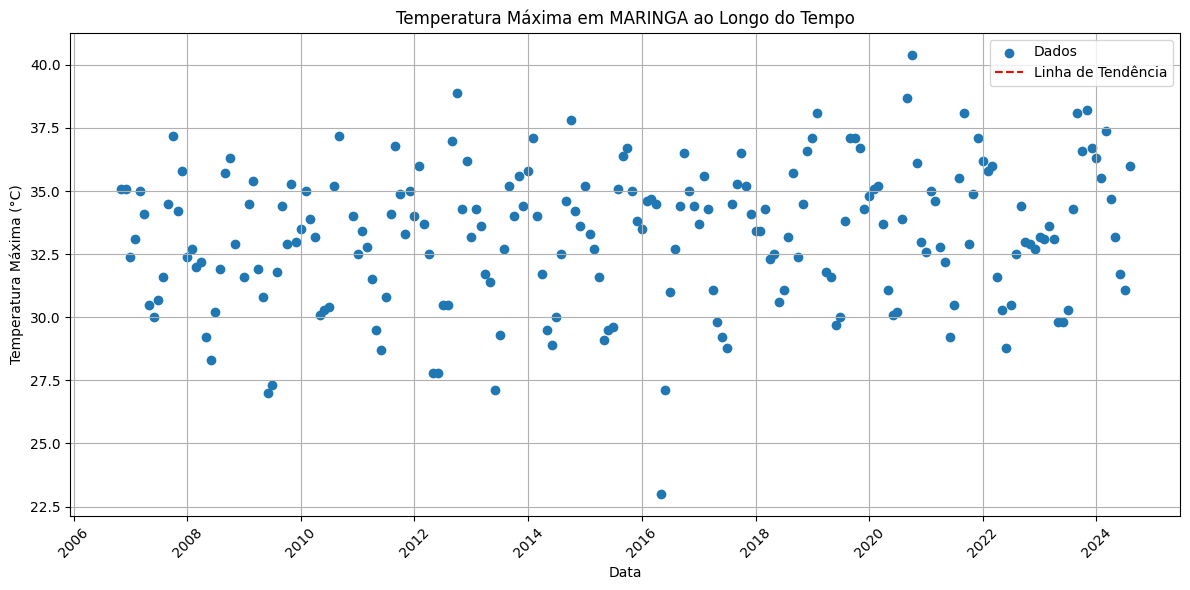

Inclinação da linha de tendência: nan
R-squared: nan


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

nome = 'MARINGA'

# Filtrando apenas os dados de uma estação
df_estacao = df_max_temp[df_max_temp['nome'] == nome].copy()

# Convertendo 'ano_mes' de Period para datetime
df_estacao['ano_mes'] = df_estacao['ano_mes'].dt.to_timestamp()

# Ordenando o DataFrame pela data
df_estacao = df_estacao.sort_values('ano_mes')

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.scatter(df_estacao['ano_mes'], df_estacao['temperatura_maxima'], marker='o', label='Dados')

# Calculando a linha de tendência
x = np.arange(len(df_estacao))
y = df_estacao['temperatura_maxima']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plotando a linha de tendência
plt.plot(df_estacao['ano_mes'], line, "r--", label='Linha de Tendência')

# Personalizando o gráfico
plt.title(f'Temperatura Máxima em {nome} ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura Máxima (°C)')
plt.grid(True)

# Rotacionando as labels do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionando legenda
plt.legend()

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Se você quiser salvar o gráfico em um arquivo, descomente a linha abaixo:
# plt.savefig('temperatura_maxima_brasilia_com_tendencia.png')

# Imprimindo informações sobre a tendência
print(f"Inclinação da linha de tendência: {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")

In [20]:
# Agrupa por estação, ano_mes e calcula a máxima temperatura média
df_temp_med = df.groupby(['nome', 'ano_mes', 'latitude', 'longitude', 'altitude'])['temperatura_media'].max().reset_index()

print(df_temp_med.head())

       nome  ano_mes   latitude  longitude  altitude  temperatura_media
0  ABROLHOS  2008-07 -17.963056 -38.703333     20.93               24.0
1  ABROLHOS  2008-08 -17.963056 -38.703333     20.93               24.6
2  ABROLHOS  2008-09 -17.963056 -38.703333     20.93               24.8
3  ABROLHOS  2008-10 -17.963056 -38.703333     20.93               25.7
4  ABROLHOS  2008-11 -17.963056 -38.703333     20.93               25.9


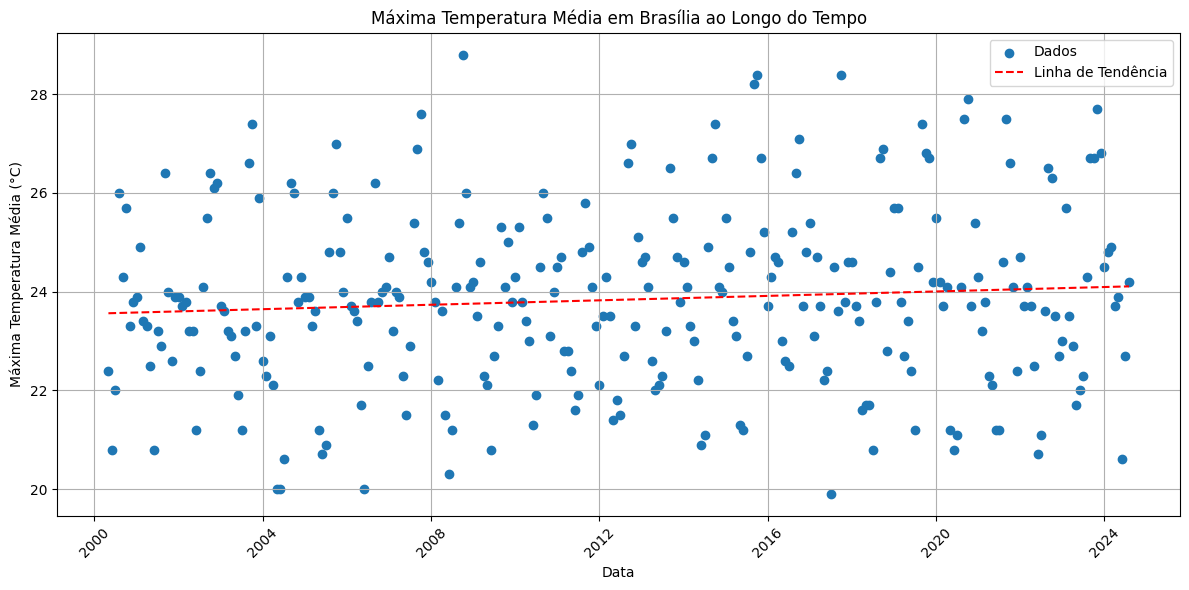

Inclinação da linha de tendência: 0.0019
R-squared: 0.0077


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Filtrando apenas os dados de BRASILIA
df_estacao = df_temp_med[df_temp_med['nome'] == 'BRASILIA'].copy()

# Convertendo 'ano_mes' de Period para datetime
df_estacao['ano_mes'] = df_estacao['ano_mes'].dt.to_timestamp()

# Ordenando o DataFrame pela data
df_estacao = df_estacao.sort_values('ano_mes')

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.scatter(df_estacao['ano_mes'], df_estacao['temperatura_media'], marker='o', label='Dados')

# Calculando a linha de tendência
x = np.arange(len(df_estacao))
y = df_estacao['temperatura_media']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plotando a linha de tendência
plt.plot(df_estacao['ano_mes'], line, "r--", label='Linha de Tendência')

# Personalizando o gráfico
plt.title('Máxima Temperatura Média em Brasília ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Máxima Temperatura Média (°C)')
plt.grid(True)

# Rotacionando as labels do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionando legenda
plt.legend()

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Se você quiser salvar o gráfico em um arquivo, descomente a linha abaixo:
# plt.savefig('temperatura_maxima_brasilia_com_tendencia.png')

# Imprimindo informações sobre a tendência
print(f"Inclinação da linha de tendência: {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

def plot_temperatura_maxima(df_max_temp, nome):
    # Filtrando apenas os dados de uma estação
    df_estacao = df_max_temp[df_max_temp['nome'] == nome].copy()
    
    # Removendo linhas com valores nulos na coluna 'temperatura_maxima'
    df_estacao = df_estacao.dropna(subset=['temperatura_maxima'])
    
    # Verificando se há dados suficientes
    if len(df_estacao) < 2:
        print(f"Dados insuficientes para {nome}. Pelo menos 2 pontos são necessários.")
        return
    
    # Convertendo 'ano_mes' de Period para datetime
    df_estacao['ano_mes'] = df_estacao['ano_mes'].dt.to_timestamp()
    
    # Ordenando o DataFrame pela data
    df_estacao = df_estacao.sort_values('ano_mes')
    
    # Criando o gráfico
    plt.figure(figsize=(12, 6))
    plt.scatter(df_estacao['ano_mes'], df_estacao['temperatura_maxima'], marker='o', label='Dados')
    
    # Calculando a linha de tendência
    x = np.arange(len(df_estacao))
    y = df_estacao['temperatura_maxima']
    
    # Usando try-except para capturar erros na regressão linear
    try:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line = slope * x + intercept
        
        # Plotando a linha de tendência
        plt.plot(df_estacao['ano_mes'], line, "r--", label='Linha de Tendência')
        
        # Imprimindo informações sobre a tendência
        print(f"Inclinação da linha de tendência: {slope:.4f}")
        print(f"R-squared: {r_value**2:.4f}")
    except Exception as e:
        print(f"Erro ao calcular a linha de tendência: {e}")
    
    # Personalizando o gráfico
    plt.title(f'Temperatura Máxima em {nome} ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Temperatura Máxima (°C)')
    plt.grid(True)
    
    # Rotacionando as labels do eixo x para melhor legibilidade
    plt.xticks(rotation=45)
    
    # Adicionando legenda
    plt.legend()
    
    # Ajustando o layout
    plt.tight_layout()
    
    # Exibindo o gráfico
    plt.show()

# Exemplo de uso:
# plot_temperatura_maxima(df_max_temp, 'MARINGA')

Inclinação da linha de tendência: 0.0028
R-squared: 0.0044


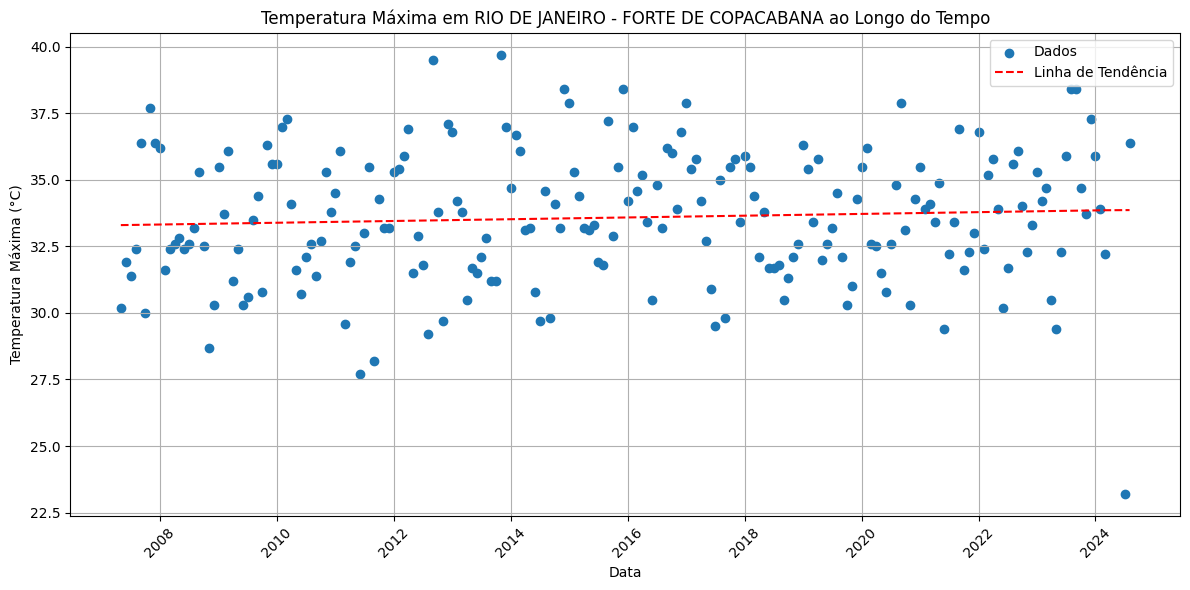

In [19]:
plot_temperatura_maxima(df_max_temp, 'RIO DE JANEIRO - FORTE DE COPACABANA')

In [20]:
df_max_temp.head()

,nome,ano_mes,latitude,longitude,altitude,temperatura_maxima
0,ABROLHOS,2008-07,-17.963056,-38.703333,20.93,27.4
1,ABROLHOS,2008-08,-17.963056,-38.703333,20.93,27.6
2,ABROLHOS,2008-09,-17.963056,-38.703333,20.93,27.5
3,ABROLHOS,2008-10,-17.963056,-38.703333,20.93,28.4
4,ABROLHOS,2008-11,-17.963056,-38.703333,20.93,28.0


In [23]:
print(df.head(2))

        data      nome codigo_estacao   latitude  longitude  altitude  \
0 2000-05-06  BRASILIA           A001 -15.789444 -47.925833   1160.96   
1 2000-05-07  BRASILIA           A001 -15.789444 -47.925833   1160.96   

   precipitacao_total  pressao_atmosferica_media  temperatura_orvalho_media  \
0                 NaN                        NaN                        NaN   
1                 NaN                        NaN                        NaN   

   temperatura_maxima  temperatura_media  temperatura_minima  \
0                 NaN                NaN                 NaN   
1                 NaN                NaN                 NaN   

   umidade_relativa_media  umidade_relativa_minima  vento_rajada_maxima  \
0                     NaN                      NaN                  NaN   
1                    49.2                     36.0                  6.3   

   vento_velocidade_media  ano_mes   ano  
0                     NaN  2000-05  2000  
1                     NaN  2000-05  2

### Inverno

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_temperatura_inverno(df_estatisticas, nome_estacao):
    # Filtrando os dados para a estação selecionada
    df_estacao = df_estatisticas[df_estatisticas['nome'] == nome_estacao].sort_values('ano')
    
    if df_estacao.empty:
        print(f"Não há dados para a estação {nome_estacao}")
        return
    
    # Criando o gráfico
    plt.figure(figsize=(12, 6))
    
    # Plotando os pontos de dados
    plt.scatter(df_estacao['ano'], df_estacao['temperatura_media'], color='blue', label='Temperatura Média')
    
    # Adicionando linha de tendência
    x = df_estacao['ano']
    y = df_estacao['temperatura_media']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label='Linha de Tendência')
    
    # Calculando o coeficiente de correlação
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Personalizando o gráfico
    plt.title(f'Evolução da Temperatura Média do Inverno - {nome_estacao}')
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Média (°C)')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Configurando o eixo x para mostrar apenas anos inteiros
    anos = df_estacao['ano'].unique()
    plt.xticks(anos, rotation=45)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Adicionando legenda
    plt.legend()
    
    # Ajustando o layout
    plt.tight_layout()
    
    # Exibindo o gráfico
    plt.show()
    
    # Imprimindo informações adicionais
    print(f"Estação: {nome_estacao}")
    print(f"Tendência: {slope:.4f}°C/ano")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"Temperatura média mínima: {df_estacao['temperatura_media'].min():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmin(), 'ano']})")
    print(f"Temperatura média máxima: {df_estacao['temperatura_media'].max():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmax(), 'ano']})")

In [32]:
df_estatisticas.head()

,nome,ano,temperatura_media,temperatura_minima,temperatura_maxima,latitude,longitude,altitude
0,ABROLHOS,2008,23.945070,22.6,24.8,-17.963056,-38.703333,20.93
1,ABROLHOS,2009,24.626923,22.8,25.6,-17.963056,-38.703333,20.93
2,ABROLHOS,2010,NaN,NaN,NaN,-17.963056,-38.703333,20.93
3,ABROLHOS,2011,24.079104,22.2,25.6,-17.963056,-38.703333,20.93
4,ABROLHOS,2012,NaN,NaN,NaN,-17.963056,-38.703333,20.93


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_temperatura_inverno(df_estatisticas, nome_estacao):
    # Filtrando os dados para a estação selecionada
    df_estacao = df_estatisticas[df_estatisticas['nome'] == nome_estacao].sort_values('ano')
    
    if df_estacao.empty:
        print(f"Não há dados para a estação {nome_estacao}")
        return
    
    # Criando o gráfico
    plt.figure(figsize=(12, 6))
    
    # Plotando os pontos de dados
    plt.scatter(df_estacao['ano'], df_estacao['temperatura_media'], color='blue', label='Temperatura Média')
    
    # Adicionando linha de tendência
    x = df_estacao['ano']
    y = df_estacao['temperatura_media']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label='Linha de Tendência')
    
    # Calculando o coeficiente de correlação
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Personalizando o gráfico
    plt.title(f'Evolução da Temperatura Média do Inverno - {nome_estacao}')
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Média (°C)')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionando legenda
    plt.legend()
    
    # Ajustando o layout
    plt.tight_layout()
    
    # Exibindo o gráfico
    plt.show()
    
    # Imprimindo informações adicionais
    print(f"Estação: {nome_estacao}")
    print(f"Tendência: {slope:.4f}°C/ano")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"Temperatura média mínima: {df_estacao['temperatura_media'].min():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmin(), 'ano']})")
    print(f"Temperatura média máxima: {df_estacao['temperatura_media'].max():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmax(), 'ano']})")


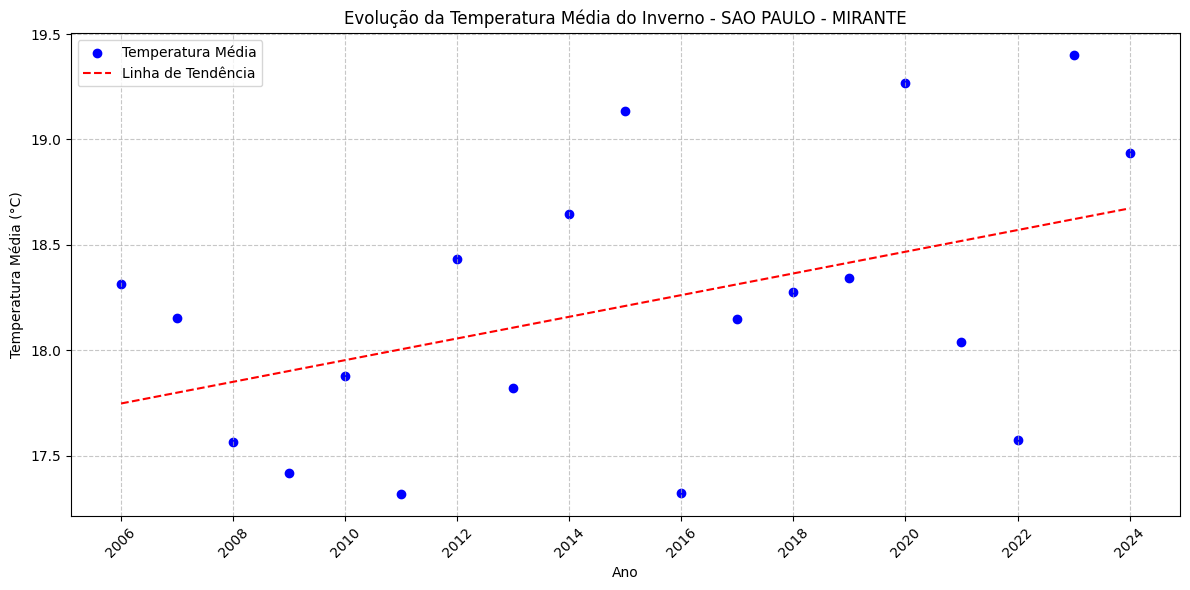

Estação: SAO PAULO - MIRANTE
Tendência: 0.0514°C/ano
R-squared: 0.2003
Temperatura média mínima: 17.32°C (Ano: 2011)
Temperatura média máxima: 19.40°C (Ano: 2023)


In [40]:
# Exemplo de uso:
plot_temperatura_inverno(df_estatisticas, 'SAO PAULO - MIRANTE')

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_temperaturas_inverno(df_estatisticas, nome_estacao):
    # Filtrando os dados para a estação selecionada
    df_estacao = df_estatisticas[df_estatisticas['nome'] == nome_estacao].sort_values('ano')
    
    if df_estacao.empty:
        print(f"Não há dados para a estação {nome_estacao}")
        return
    
    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plotando a linha da temperatura média
    ax.plot(df_estacao['ano'], df_estacao['temperatura_media'], color='blue', marker='o', label='Temperatura Média')
    
    # Adicionando barras de erro para máximas e mínimas
    ax.errorbar(df_estacao['ano'], df_estacao['temperatura_media'], 
                yerr=[df_estacao['temperatura_media'] - df_estacao['temperatura_minima'], 
                      df_estacao['temperatura_maxima'] - df_estacao['temperatura_media']],
                fmt='none', ecolor='gray', capsize=5, alpha=0.5)
    
    # Adicionando linha de tendência
    x = df_estacao['ano']
    y = df_estacao['temperatura_media']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", label='Linha de Tendência')
    
    # Calculando o coeficiente de correlação
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Personalizando o gráfico
    ax.set_title(f'Evolução das Temperaturas do Inverno - {nome_estacao}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Configurando o eixo x para mostrar apenas anos inteiros
    anos = df_estacao['ano'].unique()
    ax.set_xticks(anos)
    ax.set_xticklabels(anos, rotation=45)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Adicionando legenda
    ax.legend()
    
    # Ajustando o layout
    plt.tight_layout()
    
    # Exibindo o gráfico
    plt.show()
    
    # Imprimindo informações adicionais
    print(f"Estação: {nome_estacao}")
    print(f"Tendência da temperatura média: {slope:.4f}°C/ano")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"Temperatura média mínima: {df_estacao['temperatura_media'].min():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmin(), 'ano']})")
    print(f"Temperatura média máxima: {df_estacao['temperatura_media'].max():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_media'].idxmax(), 'ano']})")
    print(f"Temperatura mais baixa registrada: {df_estacao['temperatura_minima'].min():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_minima'].idxmin(), 'ano']})")
    print(f"Temperatura mais alta registrada: {df_estacao['temperatura_maxima'].max():.2f}°C (Ano: {df_estacao.loc[df_estacao['temperatura_maxima'].idxmax(), 'ano']})")


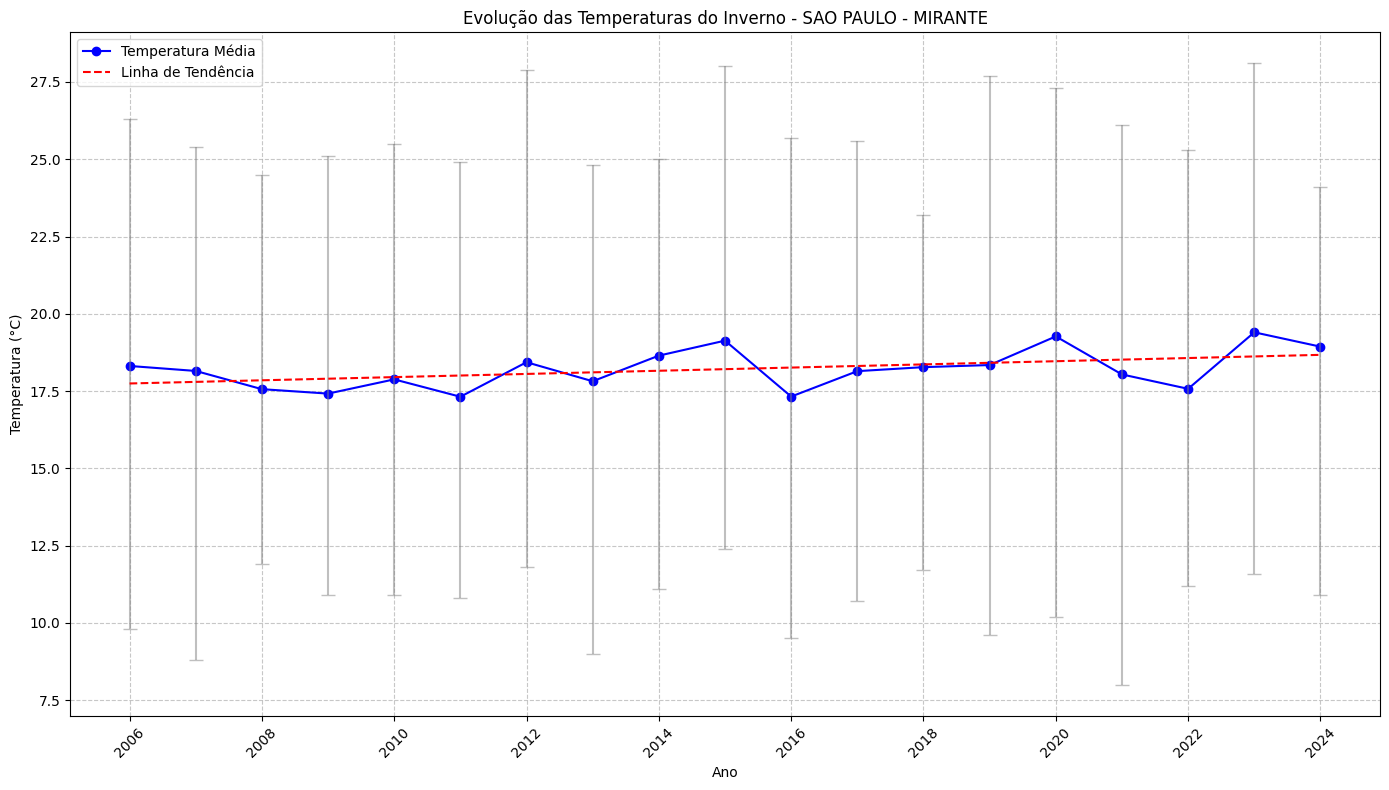

Estação: SAO PAULO - MIRANTE
Tendência da temperatura média: 0.0514°C/ano
R-squared: 0.2003
Temperatura média mínima: 17.32°C (Ano: 2011)
Temperatura média máxima: 19.40°C (Ano: 2023)
Temperatura mais baixa registrada: 8.00°C (Ano: 2021)
Temperatura mais alta registrada: 28.10°C (Ano: 2023)


In [41]:
# Exemplo de uso:
plot_temperaturas_inverno(df_estatisticas, 'SAO PAULO - MIRANTE')

## Normais climatológicas

In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Caminho para o arquivo Excel
caminho_arquivo = 'data/dados_inmet.xlsx'

# Lê o arquivo Excel
excel_file = pd.ExcelFile(caminho_arquivo)

# Dicionário para armazenar os DataFrames
dataframes = {}

# Itera sobre cada planilha no arquivo Excel
for sheet_name in excel_file.sheet_names:
    # Lê a planilha e cria um DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Atribui o DataFrame ao dicionário usando o nome da planilha como chave
    dataframes[sheet_name] = df

# Exemplo de como acessar um DataFrame específico
# print(dataframes['Nome_da_Planilha'])

# Exemplo de como listar todos os nomes das planilhas (agora nomes dos DataFrames)
print("DataFrames criados:")
for nome in dataframes.keys():
    print(f"- {nome}")

DataFrames criados:
- 1961_estacoes
- 1981_estacoes
- 1991_estacoes
- 1961_tmed
- 1981_tmed
- 1991_tmed


In [3]:
import numpy as np

def organizar_dados(dataframes):
    # Extrair os DataFrames de temperatura
    dfs_tmed = {k: v for k, v in dataframes.items() if 'tmed' in k}
    
    # Criar uma lista para armazenar os dados processados
    dados_processados = []
    
    # Processar cada DataFrame de temperatura
    for ano, df in dfs_tmed.items():
        ano = ano.split('_')[0]  # Extrair o ano do nome do DataFrame
        
        # Reorganizar os dados
        df_melted = df.melt(id_vars=['codigo', 'nome_estacao', 'uf'],
                            value_vars=['janeiro', 'fevereiro', 'marco', 'abril', 'maio', 'junho', 
                                        'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
                            var_name='mes', value_name='temperatura')
        
        # Adicionar coluna de ano
        df_melted['ano'] = ano
        
        dados_processados.append(df_melted)
    
    # Combinar todos os dados processados
    df_final = pd.concat(dados_processados, ignore_index=True)
    
    # Converter mês para número
    meses_dict = {'janeiro': 1, 'fevereiro': 2, 'marco': 3, 'abril': 4, 'maio': 5, 'junho': 6,
                  'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12}
    df_final['mes_num'] = df_final['mes'].map(meses_dict)
    
    # Ordenar os dados
    df_final = df_final.sort_values(['codigo', 'ano', 'mes_num'])
    
    return df_final

# Usar a função
df_organizado = organizar_dados(dataframes)

# Visualizar as primeiras linhas do DataFrame organizado
print(df_organizado.head())

# Informações sobre o DataFrame
print(df_organizado.info())

       codigo nome_estacao  uf        mes  temperatura   ano  mes_num
220   82024.0    Boa Vista  RR    janeiro         27.5  1961        1
519   82024.0    Boa Vista  RR  fevereiro         28.0  1961        2
818   82024.0    Boa Vista  RR      marco         28.4  1961        3
1117  82024.0    Boa Vista  RR      abril         28.0  1961        4
1416  82024.0    Boa Vista  RR       maio         26.9  1961        5
<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 220 to 9071
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        9060 non-null   float64
 1   nome_estacao  9060 non-null   object 
 2   uf            9060 non-null   object 
 3   mes           9072 non-null   object 
 4   temperatura   9009 non-null   float64
 5   ano           9072 non-null   object 
 6   mes_num       9072 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 567.0+ KB
None


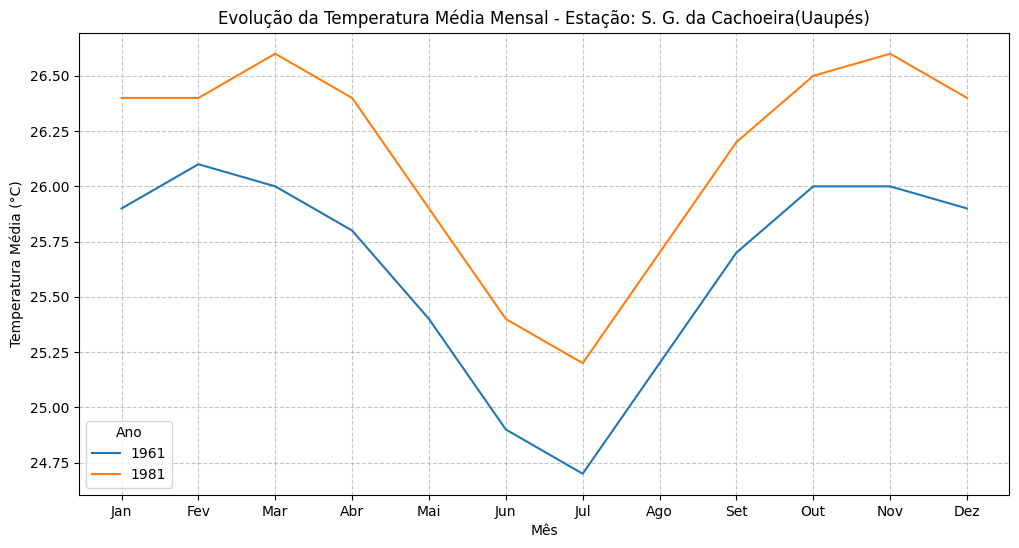

In [22]:
import matplotlib.pyplot as plt

def criar_grafico_estacao(df, codigo_estacao):
    # Filtrar dados para a estação específica
    df_estacao = df[df['codigo'] == codigo_estacao]
    
    # Obter o nome da estação
    nome_estacao = df_estacao['nome_estacao'].iloc[0]
    
    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    
    for ano in df_estacao['ano'].unique():
        df_ano = df_estacao[df_estacao['ano'] == ano]
        plt.plot(df_ano['mes_num'], df_ano['temperatura'], label=ano)
    
    plt.title(f'Evolução da Temperatura Média Mensal - Estação: {nome_estacao}')
    plt.xlabel('Mês')
    plt.ylabel('Temperatura Média (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.legend(title='Ano')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

# Exemplo de uso da função para uma estação específica
codigo_estacao_exemplo = df_organizado['codigo'].iloc[200]  # Usando o primeiro código de estação como exemplo
criar_grafico_estacao(df_organizado, codigo_estacao_exemplo)

# Para criar gráficos para todas as estações
# for codigo in df_organizado['codigo'].unique():
#    criar_grafico_estacao(df_organizado, codigo)

In [5]:
df_organizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9072 entries, 220 to 9071
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        9060 non-null   float64
 1   nome_estacao  9060 non-null   object 
 2   uf            9060 non-null   object 
 3   mes           9072 non-null   object 
 4   temperatura   9009 non-null   float64
 5   ano           9072 non-null   object 
 6   mes_num       9072 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 567.0+ KB


In [6]:
def filtrar_estacoes_completas(df):
    # Identificar os anos únicos no DataFrame
    anos = df['ano'].unique()
    
    # Verificar se temos exatamente 3 anos
    if len(anos) != 3:
        print(f"Atenção: Encontrados {len(anos)} anos diferentes. Esperava-se 3 anos.")
    
    # Contar o número de anos para cada estação
    contagem_anos = df.groupby('codigo')['ano'].nunique()
    
    # Selecionar estações com dados para todos os 3 anos
    estacoes_completas = contagem_anos[contagem_anos == 3].index
    
    # Filtrar o DataFrame original
    df_filtrado = df[df['codigo'].isin(estacoes_completas)]
    
    print(f"Número de estações original: {df['codigo'].nunique()}")
    print(f"Número de estações após filtro: {df_filtrado['codigo'].nunique()}")
    
    return df_filtrado

# Aplicar o filtro ao DataFrame organizado
df_filtrado = filtrar_estacoes_completas(df_organizado)

# Visualizar as primeiras linhas do DataFrame filtrado
print(df_filtrado.head())

# Informações sobre o DataFrame filtrado
print(df_filtrado.info())

# Verificar a distribuição de anos no DataFrame filtrado
print(df_filtrado['ano'].value_counts())

Número de estações original: 398
Número de estações após filtro: 111
       codigo nome_estacao  uf        mes  temperatura   ano  mes_num
220   82024.0    Boa Vista  RR    janeiro         27.5  1961        1
519   82024.0    Boa Vista  RR  fevereiro         28.0  1961        2
818   82024.0    Boa Vista  RR      marco         28.4  1961        3
1117  82024.0    Boa Vista  RR      abril         28.0  1961        4
1416  82024.0    Boa Vista  RR       maio         26.9  1961        5
<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 220 to 9048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        3996 non-null   float64
 1   nome_estacao  3996 non-null   object 
 2   uf            3996 non-null   object 
 3   mes           3996 non-null   object 
 4   temperatura   3964 non-null   float64
 5   ano           3996 non-null   object 
 6   mes_num       3996 non-null   int64  
dtypes: float64(2), i

In [8]:
unique_estacoes = df_filtrado['nome_estacao'].unique()
print(unique_estacoes)

['Boa Vista' 'BOA VISTA' 'Macapá' 'MACAPA' 'Barcelos' 'BARCELOS'
 'Tracuateua (Operante)' 'TRACUATEUA' 'Óbidos' 'OBIDOS' 'Monte Alegre'
 'MONTE ALEGRE' 'Porto de Moz' 'PORTO DE MOZ' 'Belém' 'BELEM' 'Belterra'
 'BELTERRA' 'Cametá' 'CAMETA' 'Manaus' 'MANAUS' 'Itacoatiara'
 'ITACOATIARA' 'Tucuruí' 'TUCURUI' 'Zé Doca' 'ZE DOCA' 'Sobral' 'SOBRAL'
 'Fortaleza' 'FORTALEZA' 'Itaituba' 'ITAITUBA' 'Guaramiranga'
 'GUARAMIRANGA' 'Marabá' 'MARABA' 'Barra do Corda' 'BARRA DO CORDA'
 'Quixeramobim' 'QUIXERAMOBIM' 'Morada Nova' 'MORADA NOVA' 'Ceará Mirim'
 'CEARA MIRIM' 'Natal' 'NATAL' 'Floriano' 'FLORIANO' 'Cruzeta' 'CRUZETA'
 'Carolina' 'CAROLINA' 'Barbalha' 'BARBALHA' 'Surubim' 'SURUBIM'
 'João Pessoa' 'JOAO PESSOA' 'Conceição do Araguaia'
 'CONCEICAO DO ARAGUAIA' 'Pedro Afonso' 'PEDRO AFONSO' 'Cabrobó' 'CABROBO'
 'Arcoverde' 'ARCOVERDE' 'Recife (Curado)' 'RECIFE (CURADO)' 'Rio Branco'
 'RIO BRANCO' 'Bom Jesus do Piauí' 'BOM JESUS DO PIAUI' 'Petrolina'
 'PETROLINA' 'Maceió' 'MACEIO' 'Santa Rita de

In [10]:
# Lista de nomes de estações
nomes_estacoes = ['Boa Vista', 'BOA VISTA', 'Macapá', 'MACAPA', 'Barcelos', 'BARCELOS', 'Tracuateua (Operante)', 'TRACUATEUA', 'Óbidos', 'OBIDOS', 'Monte Alegre', 'MONTE ALEGRE', 'Porto de Moz', 'PORTO DE MOZ', 'Belém', 'BELEM', 'Belterra', 'BELTERRA', 'Cametá', 'CAMETA', 'Manaus', 'MANAUS', 'Itacoatiara', 'ITACOATIARA', 'Tucuruí', 'TUCURUI', 'Zé Doca', 'ZE DOCA', 'Sobral', 'SOBRAL', 'Fortaleza', 'FORTALEZA', 'Itaituba', 'ITAITUBA', 'Guaramiranga', 'GUARAMIRANGA', 'Marabá', 'MARABA', 'Barra do Corda', 'BARRA DO CORDA', 'Quixeramobim', 'QUIXERAMOBIM', 'Morada Nova', 'MORADA NOVA', 'Ceará Mirim', 'CEARA MIRIM', 'Natal', 'NATAL', 'Floriano', 'FLORIANO', 'Cruzeta', 'CRUZETA', 'Carolina', 'CAROLINA', 'Barbalha', 'BARBALHA', 'Surubim', 'SURUBIM', 'João Pessoa', 'JOAO PESSOA', 'Conceição do Araguaia', 'CONCEICAO DO ARAGUAIA', 'Pedro Afonso', 'PEDRO AFONSO', 'Cabrobó', 'CABROBO', 'Arcoverde', 'ARCOVERDE', 'Recife (Curado)', 'RECIFE (CURADO)', 'Rio Branco', 'RIO BRANCO', 'Bom Jesus do Piauí', 'BOM JESUS DO PIAUI', 'Petrolina', 'PETROLINA', 'Maceió', 'MACEIO', 'Santa Rita de Cássia (Ibipetuba)', 'STa. R. DE CASSIA (IBIPETUBA)', 'Aracaju', 'ARACAJU', 'Propriá', 'PROPRIA', 'Morro do Chapéu', 'MORRO DO CHAPEU', 'Cipó', 'CIPO', 'Itabaianinha', 'ITABAIANINHA', 'Peixe', 'PEIXE', 'Salvador (Ondina)', 'SALVADOR (ONDINA)', 'Taguatinga', 'TAGUATINGA', 'Lençóis', 'LENCOIS', 'Alagoinhas', 'ALAGOINHAS', 'Bom Jesus da Lapa', 'BOM JESUS DA LAPA', 'Diamantino', 'DIAMANTINO', 'Cuiabá', 'CUIABA', 'Aragarças', 'ARAGARCAS', 'Goiás', 'GOIAS', 'Pirenópolis', 'PIRENOPOLIS', 'Brasília', 'BRASILIA', 'Formosa', 'FORMOSA', 'Januária', 'JANUARIA', 'Goiânia', 'GOIANIA', 'Montes Claros', 'MONTES CLAROS', 'Salinas', 'SALINAS', 'Araçuaí', 'ARACUAI', 'Jataí', 'JATAI', 'Itamarandiba', 'ITAMARANDIBA', 'Capinópolis', 'CAPINOPOLIS', 'Catalão', 'CATALAO', 'Patos de Minas', 'PATOS DE MINAS', 'Pompeu', 'POMPEU', 'Uberaba', 'UBERABA', 'Araxá', 'ARAXA', 'Bambuí', 'BAMBUI', 'Belo Horizonte', 'BELO HORIZONTE', 'Conceição do Mato Dentro', 'C. DO MATO DENTRO', 'Caratinga', 'CARATINGA', 'Franca', 'FRANCA', 'Viçosa', 'VICOSA', 'Vitória', 'VITORIA', 'Machado', 'MACHADO', 'Lavras', 'LAVRAS', 'Juiz de Fora', 'JUIZ DE FORA', 'Itaperuna', 'ITAPERUNA', 'Campos ', 'CAMPOS', 'Cordeiro', 'CORDEIRO', 'São Carlos', 'SAO CARLOS', 'São Lourenço', 'SAO LOURENCO', 'Londrina', 'LONDRINA', 'Maringá', 'MARINGA', 'São Paulo (Mir. de Santana)', 'SAO PAULO(MIR.de SANTANA)', 'Santo Antônio de Pádua', 'SANTO ANTONIO DE PADUA', 'Irati', 'IRATI', 'Curitiba', 'CURITIBA', 'Chapecó', 'CHAPECO', 'Campos Novos', 'CAMPOS NOVOS', 'Lages', 'LAGES', 'Florianópolis', 'FLORIANOPOLIS', 'São Luiz Gonzaga', 'SAO LUIZ GONZAGA', 'Cruz Alta', 'CRUZ ALTA', 'Passo Fundo', 'PASSO FUNDO', 'Bom Jesus', 'BOM JESUS', 'São Joaquim', 'SAO JOAQUIM', 'Uruguaiana', 'URUGUAIANA', 'Santa Maria', 'SANTA MARIA', 'Caxias do Sul', 'CAXIAS DO SUL', 'Torres', 'TORRES', 'Encruzilhada do Sul', 'ENCRUZILHADA DO SUL', 'Porto Alegre', 'PORTO ALEGRE', 'Bagé', 'BAGE', 'Pelotas', 'PELOTAS', 'Rio Grande', 'RIO GRANDE', 'Santa Vitória do Palmar', 'SANTA VITORIA DO PALMAR']

# Criar um dicionário de mapeamento
mapeamento = {}
for i in range(0, len(nomes_estacoes), 2):
    nome_correto = nomes_estacoes[i]
    nome_maiusculo = nomes_estacoes[i+1] if i+1 < len(nomes_estacoes) else None
    if nome_maiusculo:
        mapeamento[nome_maiusculo] = nome_correto

# Função para padronizar o nome da estação
def padronizar_nome(nome):
    return mapeamento.get(nome, nome)

# Aplicar a padronização ao DataFrame
df_filtrado['nome_estacao'] = df_filtrado['nome_estacao'].apply(padronizar_nome)

# Verificar os valores únicos após a padronização
valores_unicos_apos = df_filtrado['nome_estacao'].unique()
print("Valores únicos após a padronização:")
print(valores_unicos_apos)
print(len(valores_unicos_apos))

Valores únicos após a padronização:
['Boa Vista' 'Macapá' 'Barcelos' 'Tracuateua (Operante)' 'Óbidos'
 'Monte Alegre' 'Porto de Moz' 'Belém' 'Belterra' 'Cametá' 'Manaus'
 'Itacoatiara' 'Tucuruí' 'Zé Doca' 'Sobral' 'Fortaleza' 'Itaituba'
 'Guaramiranga' 'Marabá' 'Barra do Corda' 'Quixeramobim' 'Morada Nova'
 'Ceará Mirim' 'Natal' 'Floriano' 'Cruzeta' 'Carolina' 'Barbalha'
 'Surubim' 'João Pessoa' 'Conceição do Araguaia' 'Pedro Afonso' 'Cabrobó'
 'Arcoverde' 'Recife (Curado)' 'Rio Branco' 'Bom Jesus do Piauí'
 'Petrolina' 'Maceió' 'Santa Rita de Cássia (Ibipetuba)' 'Aracaju'
 'Propriá' 'Morro do Chapéu' 'Cipó' 'Itabaianinha' 'Peixe'
 'Salvador (Ondina)' 'Taguatinga' 'Lençóis' 'Alagoinhas'
 'Bom Jesus da Lapa' 'Diamantino' 'Cuiabá' 'Aragarças' 'Goiás'
 'Pirenópolis' 'Brasília' 'Formosa' 'Januária' 'Goiânia' 'Montes Claros'
 'Salinas' 'Araçuaí' 'Jataí' 'Itamarandiba' 'Capinópolis' 'Catalão'
 'Patos de Minas' 'Pompeu' 'Uberaba' 'Araxá' 'Bambuí' 'Belo Horizonte'
 'Conceição do Mato Dentro' '

C:\Users\paulo\AppData\Local\Temp\ipykernel_7368\28956494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nome_estacao'] = df_filtrado['nome_estacao'].apply(padronizar_nome)


In [13]:
df_filtrado.head(36)

,codigo,nome_estacao,uf,mes,temperatura,ano,mes_num
220,82024.0,Boa Vista,RR,janeiro,27.5,1961,1
519,82024.0,Boa Vista,RR,fevereiro,28.0,1961,2
818,82024.0,Boa Vista,RR,marco,28.4,1961,3
1117,82024.0,Boa Vista,RR,abril,28.0,1961,4
1416,82024.0,Boa Vista,RR,maio,26.9,1961,5
1715,82024.0,Boa Vista,RR,junho,25.9,1961,6
2014,82024.0,Boa Vista,RR,julho,25.8,1961,7
2313,82024.0,Boa Vista,RR,agosto,26.6,1961,8
2612,82024.0,Boa Vista,RR,setembro,27.7,1961,9
2911,82024.0,Boa Vista,RR,outubro,28.2,1961,10


In [14]:
import pandas as pd
import numpy as np

# Assumindo que df_filtrado já está carregado e contém as colunas necessárias

# Função para verificar se uma estação tem dados para todos os meses de todos os anos
def tem_dados_completos(grupo):
    # Verifica se há algum valor ausente
    if grupo['temperatura'].isnull().any():
        return False
    
    # Verifica se todos os meses estão presentes para cada ano
    anos = grupo['ano'].unique()
    for ano in anos:
        meses_do_ano = grupo[grupo['ano'] == ano]['mes'].nunique()
        if meses_do_ano != 12:
            return False
    
    return True

# Agrupando por estação e aplicando a função de verificação
estacoes_completas = df_filtrado.groupby('nome_estacao').filter(tem_dados_completos)

# Criando o novo DataFrame apenas com as estações que têm dados completos
df_completo = df_filtrado[df_filtrado['nome_estacao'].isin(estacoes_completas['nome_estacao'].unique())]

# Verificando o número de estações antes e depois do filtro
num_estacoes_antes = df_filtrado['nome_estacao'].nunique()
num_estacoes_depois = df_completo['nome_estacao'].nunique()

print(f"Número de estações antes do filtro: {num_estacoes_antes}")
print(f"Número de estações após o filtro: {num_estacoes_depois}")
print(f"Número de estações removidas: {num_estacoes_antes - num_estacoes_depois}")

# Exibindo as primeiras linhas do novo DataFrame
print("\nPrimeiras linhas do novo DataFrame:")
print(df_completo.head())

# Exibindo informações sobre o novo DataFrame
print("\nInformações sobre o novo DataFrame:")
print(df_completo.info())

Número de estações antes do filtro: 111
Número de estações após o filtro: 86
Número de estações removidas: 25

Primeiras linhas do novo DataFrame:
       codigo nome_estacao  uf        mes  temperatura   ano  mes_num
23    82098.0       Macapá  AP    janeiro         25.9  1961        1
322   82098.0       Macapá  AP  fevereiro         25.7  1961        2
621   82098.0       Macapá  AP      marco         25.7  1961        3
920   82098.0       Macapá  AP      abril         26.0  1961        4
1219  82098.0       Macapá  AP       maio         26.2  1961        5

Informações sobre o novo DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 3096 entries, 23 to 9048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        3096 non-null   float64
 1   nome_estacao  3096 non-null   object 
 2   uf            3096 non-null   object 
 3   mes           3096 non-null   object 
 4   temperatura   3096 non-null   f

In [15]:
df_completo.to_csv('dados_inmet_completos.csv', index=False)

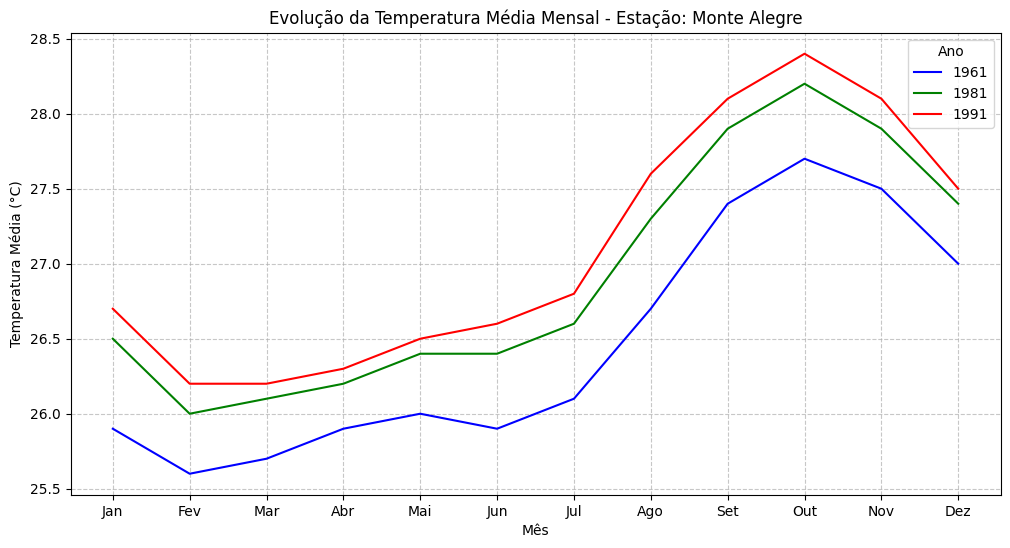

In [28]:
import matplotlib.pyplot as plt

def criar_grafico_estacao(df, codigo_estacao):
    # Filtrar dados para a estação específica
    df_estacao = df[df['codigo'] == codigo_estacao]
    
    # Obter o nome da estação
    nome_estacao = df_estacao['nome_estacao'].iloc[0]
    
    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    
    cores = {'1961': 'blue', '1981': 'green', '1991': 'red'}
    
    for ano in df_estacao['ano'].unique():
        df_ano = df_estacao[df_estacao['ano'] == ano]
        plt.plot(df_ano['mes_num'], df_ano['temperatura'], label=ano, color=cores[ano])
    
    plt.title(f'Evolução da Temperatura Média Mensal - Estação: {nome_estacao}')
    plt.xlabel('Mês')
    plt.ylabel('Temperatura Média (°C)')
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.legend(title='Ano')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

# Exemplo de uso da função para uma estação específica
codigo_estacao_exemplo = df_filtrado['codigo'].iloc[180]  # Usando o primeiro código de estação como exemplo
criar_grafico_estacao(df_filtrado, codigo_estacao_exemplo)

# Para criar gráficos para todas as estações (descomente se necessário)
# for codigo in df_filtrado['codigo'].unique():
#     criar_grafico_estacao(df_filtrado, codigo)

In [38]:
import pandas as pd

def obter_resumo_estacoes_corrigido(df):
    # Selecionar apenas as colunas necessárias
    resumo = df[['codigo', 'nome_estacao', 'uf']].copy()
    
    # Padronizar os nomes das estações (primeira letra de cada palavra maiúscula)
    resumo['nome_estacao'] = resumo['nome_estacao'].str.title()
    
    # Remover espaços extras e padronizar acentuação
    resumo['nome_estacao'] = resumo['nome_estacao'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('ascii')
    
    # Remover duplicatas
    resumo = resumo.drop_duplicates()
    
    # Ordenar por código e nome da estação
    resumo = resumo.sort_values(['codigo', 'nome_estacao'])
    
    # Resetar o índice
    resumo = resumo.reset_index(drop=True)
    
    return resumo

# Aplicar a função ao DataFrame filtrado
resumo_estacoes_corrigido = obter_resumo_estacoes_corrigido(df_filtrado)

# Exibir as primeiras linhas do resumo
print(resumo_estacoes_corrigido.head())

# Exibir informações sobre o DataFrame de resumo
print(resumo_estacoes_corrigido.info())

# Verificar se ainda existem duplicatas no código
duplicatas = resumo_estacoes_corrigido[resumo_estacoes_corrigido.duplicated('codigo', keep=False)]
if not duplicatas.empty:
    print("\nAtenção: Ainda existem códigos duplicados:")
    print(duplicatas)
else:
    print("\nNão há mais códigos duplicados.")

# Salvar o resumo corrigido em um arquivo CSV
resumo_estacoes_corrigido.to_csv('resumo_estacoes_corrigido.csv', index=False)

# Criar um dicionário de código para nome da estação
dict_estacoes = dict(zip(resumo_estacoes_corrigido['codigo'], resumo_estacoes_corrigido['nome_estacao']))
print("\nPrimeiros 5 itens do dicionário de estações:")
print(dict(list(dict_estacoes.items())[:5]))

# Contar o número de estações por UF
contagem_por_uf = resumo_estacoes_corrigido['uf'].value_counts()
print("\nNúmero de estações por UF:")
print(contagem_por_uf)

    codigo           nome_estacao  uf
0  82024.0              Boa Vista  RR
1  82098.0                 Macapa  AP
2  82113.0               Barcelos  AM
3  82145.0             Tracuateua  PA
4  82145.0  Tracuateua (Operante)  PA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        115 non-null    float64
 1   nome_estacao  115 non-null    object 
 2   uf            115 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.8+ KB
None

Atenção: Ainda existem códigos duplicados:
     codigo                      nome_estacao  uf
3   82145.0                        Tracuateua  PA
4   82145.0             Tracuateua (Operante)  PA
40  83076.0  Santa Rita De Cassia (Ibipetuba)  BA
41  83076.0     Sta. R. De Cassia (Ibipetuba)  BA
75  83589.0                 C. Do Mato Dentro  MG
76  83589.0          Conceicao Do Mato Dentro  MG
91

In [39]:
import pandas as pd

def corrigir_nomes_estacoes(df):
    # Criar uma cópia para não modificar o DataFrame original inplace
    df_corrigido = df.copy()
    
    # Padronizar os nomes das estações (primeira letra de cada palavra maiúscula)
    df_corrigido['nome_estacao'] = df_corrigido['nome_estacao'].str.title()
    
    # Remover espaços extras e padronizar acentuação
    df_corrigido['nome_estacao'] = df_corrigido['nome_estacao'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('ascii')
    
    return df_corrigido

# Aplicar a correção ao df_filtrado
df_filtrado_corrigido = corrigir_nomes_estacoes(df_filtrado)

# Verificar se há duplicatas considerando todas as colunas relevantes
colunas_chave = ['codigo', 'nome_estacao', 'uf', 'ano', 'mes']
duplicatas = df_filtrado_corrigido[df_filtrado_corrigido.duplicated(subset=colunas_chave, keep=False)]

if not duplicatas.empty:
    print("Atenção: Ainda existem entradas duplicadas após a correção:")
    print(duplicatas)
    
    # Remover duplicatas, mantendo a primeira ocorrência
    df_filtrado_corrigido = df_filtrado_corrigido.drop_duplicates(subset=colunas_chave, keep='first')
    print("\nDuplicatas removidas.")
else:
    print("Não há duplicatas no DataFrame corrigido.")

# Verificar o número de estações únicas
num_estacoes = df_filtrado_corrigido['codigo'].nunique()
print(f"\nNúmero de estações únicas: {num_estacoes}")

# Criar um resumo das estações corrigidas
resumo_estacoes = df_filtrado_corrigido[['codigo', 'nome_estacao', 'uf']].drop_duplicates().sort_values('codigo')
print("\nResumo das estações corrigidas:")
print(resumo_estacoes.head())

# Salvar o DataFrame corrigido
df_filtrado_corrigido.to_csv('dados_temperatura_corrigidos.csv', index=False)
resumo_estacoes.to_csv('resumo_estacoes_corrigido.csv', index=False)

print("\nDataFrame corrigido e resumo das estações foram salvos em arquivos CSV.")

# Mostrar informações sobre o DataFrame corrigido
print("\nInformações sobre o DataFrame corrigido:")
print(df_filtrado_corrigido.info())

Não há duplicatas no DataFrame corrigido.

Número de estações únicas: 111

Resumo das estações corrigidas:
       codigo           nome_estacao  uf
220   82024.0              Boa Vista  RR
23    82098.0                 Macapa  AP
5     82113.0               Barcelos  AM
149   82145.0  Tracuateua (Operante)  PA
3781  82145.0             Tracuateua  PA

DataFrame corrigido e resumo das estações foram salvos em arquivos CSV.

Informações sobre o DataFrame corrigido:
<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 220 to 9048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        3996 non-null   float64
 1   nome_estacao  3996 non-null   object 
 2   uf            3996 non-null   object 
 3   mes           3996 non-null   object 
 4   temperatura   3964 non-null   float64
 5   ano           3996 non-null   object 
 6   mes_num       3996 non-null   int64  
dtypes: float64(2), int64(1), object(4)
me

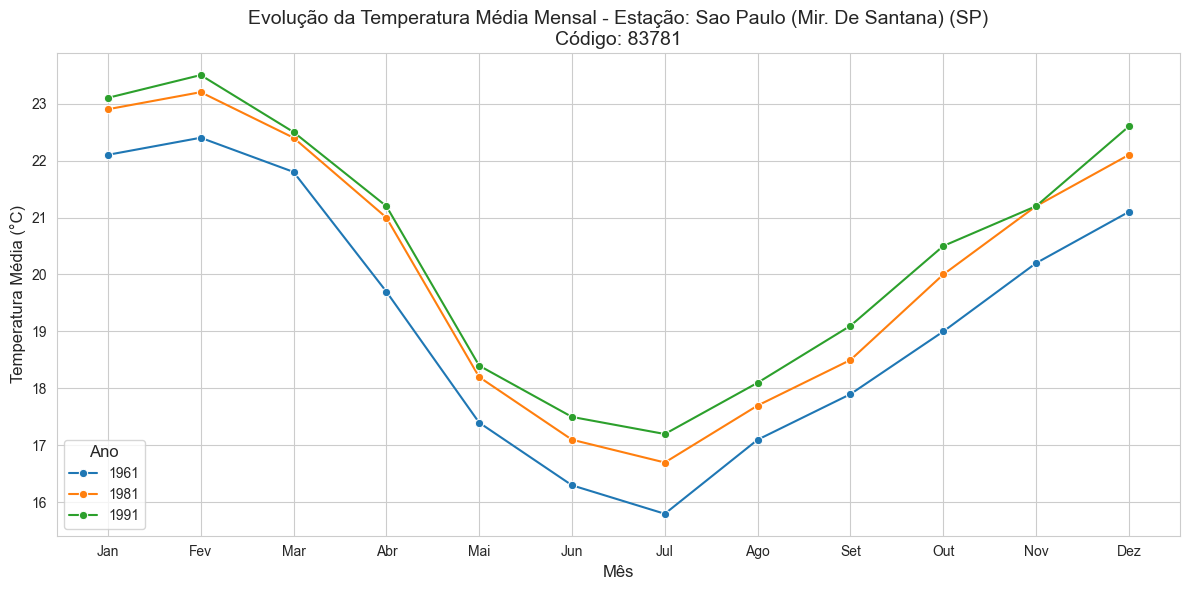

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotar_grafico_por_codigo(df, codigo_estacao):
    # Filtrar dados para a estação específica
    df_estacao = df[df['codigo'] == codigo_estacao]
    
    if df_estacao.empty:
        print(f"Não foram encontrados dados para a estação com código {codigo_estacao}")
        return
    
    # Obter o nome da estação e UF
    nome_estacao = df_estacao['nome_estacao'].iloc[0]
    uf = df_estacao['uf'].iloc[0]
    
    # Configurar o estilo do gráfico
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Criar o gráfico
    for ano in sorted(df_estacao['ano'].unique()):
        df_ano = df_estacao[df_estacao['ano'] == ano]
        sns.lineplot(x='mes_num', y='temperatura', data=df_ano, label=ano, marker='o')
    
    # Configurar o título e rótulos
    plt.title(f'Evolução da Temperatura Média Mensal - Estação: {nome_estacao} ({uf})\nCódigo: {codigo_estacao}', fontsize=14)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Temperatura Média (°C)', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    
    # Configurar a legenda
    plt.legend(title='Ano', title_fontsize='12', fontsize='10')
    
    # Ajustar o layout
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

# Exemplo de uso da função
# Substitua XXXXX pelo código da estação que você quer visualizar
codigo_exemplo = 83781  # Por exemplo, 82024.0 para Boa Vista
plotar_grafico_por_codigo(df_filtrado_corrigido, codigo_exemplo)

# Função para listar todas as estações disponíveis
def listar_estacoes(df):
    estacoes = df[['codigo', 'nome_estacao', 'uf']].drop_duplicates().sort_values('codigo')
    for _, estacao in estacoes.iterrows():
        print(f"Código: {estacao['codigo']}, Nome: {estacao['nome_estacao']}, UF: {estacao['uf']}")

# Descomente a linha abaixo se quiser ver a lista de todas as estações disponíveis
# listar_estacoes(df_filtrado_corrigido)

## Slope chart

In [42]:
import pandas as pd

def criar_df_anual(df):
    # Agrupar por código, nome da estação, UF e ano, calculando a média anual da temperatura
    df_anual = df.groupby(['codigo', 'nome_estacao', 'uf', 'ano'])['temperatura'].mean().reset_index()
    
    # Renomear a coluna de temperatura para deixar claro que é a média anual
    df_anual = df_anual.rename(columns={'temperatura': 'temperatura_media_anual'})
    
    # Arredondar a temperatura média anual para 2 casas decimais
    df_anual['temperatura_media_anual'] = df_anual['temperatura_media_anual'].round(2)
    
    # Ordenar o DataFrame por código da estação e ano
    df_anual = df_anual.sort_values(['codigo', 'ano'])
    
    return df_anual

# Criar o novo DataFrame anual
df_anual = criar_df_anual(df_filtrado_corrigido)

# Exibir as primeiras linhas do novo DataFrame
print(df_anual.head(15))  # Mostra as primeiras 15 linhas para ver múltiplos anos por estação

# Informações sobre o novo DataFrame
print("\nInformações sobre o DataFrame anual:")
print(df_anual.info())

# Salvar o DataFrame anual em um arquivo CSV
df_anual.to_csv('dados_temperatura_anuais.csv', index=False)
print("\nDataFrame anual foi salvo em 'dados_temperatura_anuais.csv'")

# Verificar o número de estações e anos únicos
num_estacoes = df_anual['codigo'].nunique()
num_anos = df_anual['ano'].nunique()
print(f"\nNúmero de estações únicas: {num_estacoes}")
print(f"Número de anos únicos: {num_anos}")

# Função para exibir dados de uma estação específica
def exibir_dados_estacao(df, codigo_estacao):
    dados_estacao = df[df['codigo'] == codigo_estacao]
    if dados_estacao.empty:
        print(f"Não foram encontrados dados para a estação com código {codigo_estacao}")
    else:
        print(f"\nDados para a estação {dados_estacao['nome_estacao'].iloc[0]} (Código: {codigo_estacao}):")
        print(dados_estacao[['ano', 'temperatura_media_anual']])

# Exemplo de uso da função exibir_dados_estacao
# Substitua XXXXX pelo código da estação que você quer visualizar
# codigo_exemplo = XXXXX  # Por exemplo, 82024.0 para Boa Vista
# exibir_dados_estacao(df_anual, codigo_exemplo)

     codigo           nome_estacao  uf   ano  temperatura_media_anual
0   82024.0              Boa Vista  RR  1961                    27.38
1   82024.0              Boa Vista  RR  1981                    27.96
2   82024.0              Boa Vista  RR  1991                    28.21
3   82098.0                 Macapa  AP  1961                    26.58
4   82098.0                 Macapa  AP  1981                    27.09
5   82098.0                 Macapa  AP  1991                    27.40
6   82113.0               Barcelos  AM  1961                    25.94
7   82113.0               Barcelos  AM  1981                    26.58
8   82113.0               Barcelos  AM  1991                    26.82
11  82145.0  Tracuateua (Operante)  PA  1961                    25.53
9   82145.0             Tracuateua  PA  1981                    26.18
10  82145.0             Tracuateua  PA  1991                    26.41
12  82178.0                 Obidos  PA  1961                    26.61
13  82178.0         

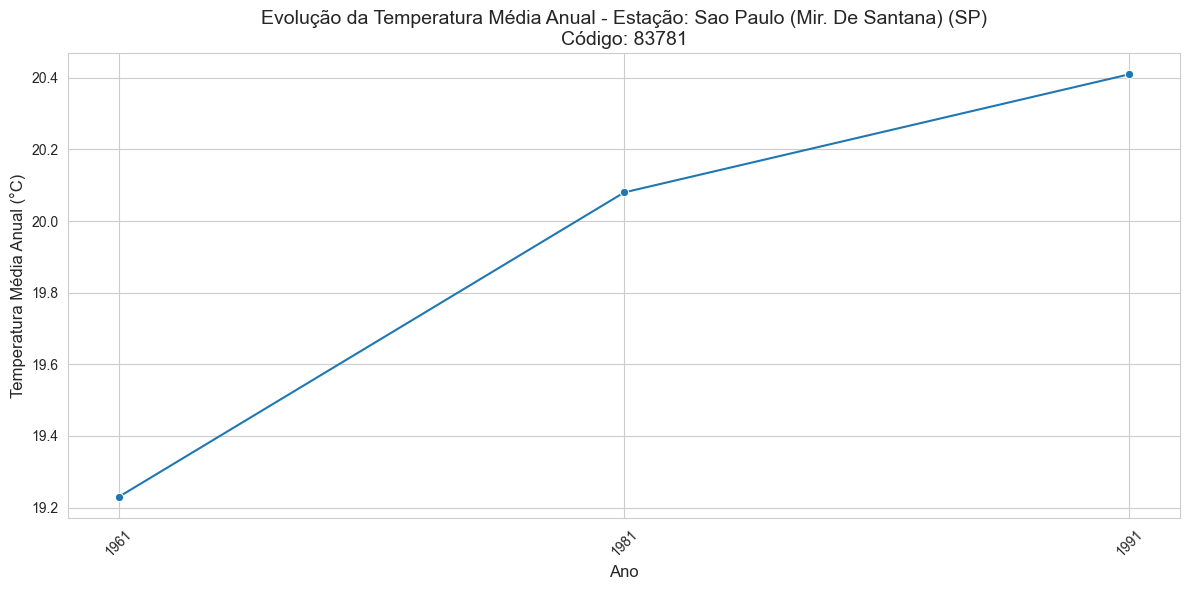

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotar_evolucao_anual(df, codigo_estacao=None):
    # Configurar o estilo do gráfico
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    if codigo_estacao:
        # Filtrar dados para a estação específica
        df_estacao = df[df['codigo'] == codigo_estacao]
        
        if df_estacao.empty:
            print(f"Não foram encontrados dados para a estação com código {codigo_estacao}")
            return
        
        # Obter o nome da estação e UF
        nome_estacao = df_estacao['nome_estacao'].iloc[0]
        uf = df_estacao['uf'].iloc[0]
        
        # Criar o gráfico
        sns.lineplot(x='ano', y='temperatura_media_anual', data=df_estacao, marker='o')
        
        # Configurar o título e rótulos
        plt.title(f'Evolução da Temperatura Média Anual - Estação: {nome_estacao} ({uf})\nCódigo: {codigo_estacao}', fontsize=14)
    else:
        # Criar o gráfico para todas as estações
        sns.lineplot(x='ano', y='temperatura_media_anual', hue='nome_estacao', data=df, marker='o')
        
        # Configurar o título e rótulos
        plt.title('Evolução da Temperatura Média Anual - Todas as Estações', fontsize=14)
    
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Temperatura Média Anual (°C)', fontsize=12)
    
    # Configurar os ticks do eixo x para mostrar todos os anos
    anos = sorted(df['ano'].unique())
    plt.xticks(anos, rotation=45)
    
    # Ajustar o layout
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()

# Exemplo de uso da função para uma estação específica
# Substitua XXXXX pelo código da estação que você quer visualizar
codigo_exemplo = 83781  # Por exemplo, 82024.0 para Boa Vista
plotar_evolucao_anual(df_anual, codigo_exemplo)

# Para plotar todas as estações em um único gráfico (pode ficar sobrecarregado se houver muitas estações)
# plotar_evolucao_anual(df_anual)

# Função para listar todas as estações disponíveis
def listar_estacoes(df):
    estacoes = df[['codigo', 'nome_estacao', 'uf']].drop_duplicates().sort_values('codigo')
    for _, estacao in estacoes.iterrows():
        print(f"Código: {estacao['codigo']}, Nome: {estacao['nome_estacao']}, UF: {estacao['uf']}")

# Descomente a linha abaixo se quiser ver a lista de todas as estações disponíveis
# listar_estacoes(df_anual)

Anos disponíveis no DataFrame: [1961, 1981, 1991]

Estações disponíveis:
Código: 82024.0, Nome: Boa Vista, UF: RR
Código: 82098.0, Nome: Macapa, UF: AP
Código: 82113.0, Nome: Barcelos, UF: AM
Código: 82145.0, Nome: Tracuateua (Operante), UF: PA
Código: 82145.0, Nome: Tracuateua, UF: PA
Código: 82178.0, Nome: Obidos, UF: PA
Código: 82181.0, Nome: Monte Alegre, UF: PA
Código: 82184.0, Nome: Porto De Moz, UF: PA
Código: 82191.0, Nome: Belem, UF: PA
Código: 82246.0, Nome: Belterra, UF: PA
Código: 82263.0, Nome: Cameta, UF: PA
Código: 82331.0, Nome: Manaus, UF: AM
Código: 82336.0, Nome: Itacoatiara, UF: AM
Código: 82361.0, Nome: Tucurui, UF: PA
Código: 82376.0, Nome: Ze Doca, UF: MA
Código: 82392.0, Nome: Sobral, UF: CE
Código: 82397.0, Nome: Fortaleza, UF: CE
Código: 82445.0, Nome: Itaituba, UF: PA
Código: 82487.0, Nome: Guaramiranga, UF: CE
Código: 82562.0, Nome: Maraba, UF: PA
Código: 82571.0, Nome: Barra Do Corda, UF: MA
Código: 82586.0, Nome: Quixeramobim, UF: CE
Código: 82588.0, Nome:

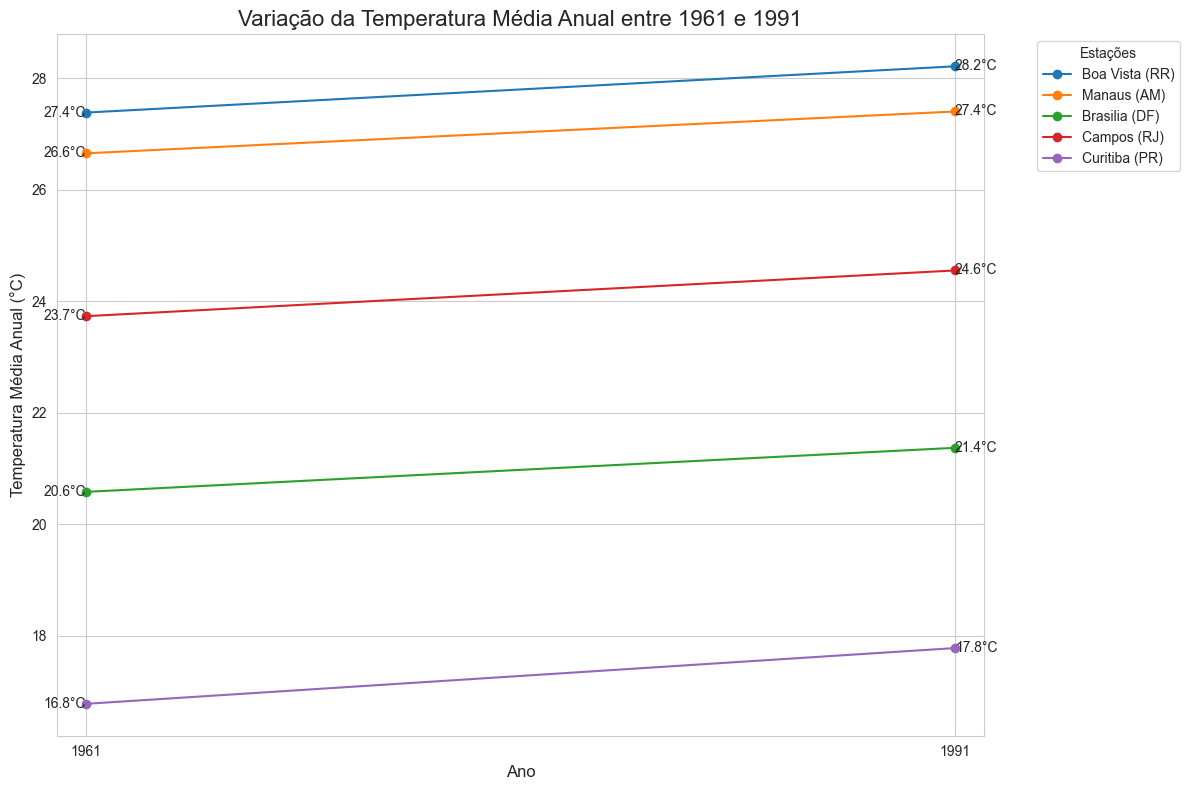


Variação de temperatura entre 1961 e 1991:
  nome_estacao  uf  temp_1961  temp_1991  variacao
0    Boa Vista  RR      27.38      28.21      0.83
1       Manaus  AM      26.65      27.40      0.75
2     Brasilia  DF      20.58      21.37      0.79
3       Campos  RJ      23.73      24.55      0.82
4     Curitiba  PR      16.78      17.78      1.00


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def criar_slope_chart(df, codigos_estacoes, ano_inicial=None, ano_final=None):
    # Converter a coluna 'ano' para inteiro, se necessário
    df['ano'] = df['ano'].astype(int)
    
    # Verificar os anos disponíveis
    anos_disponiveis = sorted(df['ano'].unique())
    if ano_inicial is None:
        ano_inicial = anos_disponiveis[0]
    if ano_final is None:
        ano_final = anos_disponiveis[-1]
    
    # Garantir que ano_inicial e ano_final sejam inteiros
    ano_inicial = int(ano_inicial)
    ano_final = int(ano_final)
    
    print(f"Anos disponíveis: {anos_disponiveis}")
    print(f"Usando ano inicial: {ano_inicial}, ano final: {ano_final}")

    # Filtrar o DataFrame para incluir apenas os anos selecionados e as estações selecionadas
    df_filtered = df[(df['ano'].isin([ano_inicial, ano_final])) & (df['codigo'].isin(codigos_estacoes))]
    
    # Verificar se temos dados para ambos os anos para cada estação
    estacoes_completas = df_filtered.groupby('codigo').filter(lambda x: x['ano'].nunique() == 2)
    
    if estacoes_completas.empty:
        print("Não há dados completos para nenhuma das estações selecionadas nos anos especificados.")
        return
    
    # Pivotar o DataFrame
    df_pivot = estacoes_completas.pivot(index=['codigo', 'nome_estacao', 'uf'], columns='ano', values='temperatura_media_anual').reset_index()
    df_pivot.columns.name = None
    df_pivot = df_pivot.rename(columns={ano_inicial: f'temp_{ano_inicial}', ano_final: f'temp_{ano_final}'})
    
    # Calcular a variação de temperatura
    df_pivot['variacao'] = df_pivot[f'temp_{ano_final}'] - df_pivot[f'temp_{ano_inicial}']
    
    # Configurar o estilo do gráfico
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    
    # Criar o slope chart
    for _, row in df_pivot.iterrows():
        plt.plot([ano_inicial, ano_final], [row[f'temp_{ano_inicial}'], row[f'temp_{ano_final}']], '-o', 
                 label=f"{row['nome_estacao']} ({row['uf']})")
        
        # Adicionar rótulos nas extremidades das linhas
        plt.text(ano_inicial, row[f'temp_{ano_inicial}'], f"{row[f'temp_{ano_inicial}']:.1f}°C", ha='right', va='center')
        plt.text(ano_final, row[f'temp_{ano_final}'], f"{row[f'temp_{ano_final}']:.1f}°C", ha='left', va='center')
    
    # Configurar o título e rótulos
    plt.title(f'Variação da Temperatura Média Anual entre {ano_inicial} e {ano_final}', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Temperatura Média Anual (°C)', fontsize=12)
    
    # Configurar os limites e ticks do eixo x
    plt.xlim(ano_inicial-1, ano_final+1)
    plt.xticks([ano_inicial, ano_final])
    
    # Adicionar legenda
    plt.legend(title='Estações', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar o layout
    plt.tight_layout()
    
    # Mostrar o gráfico
    plt.show()
    
    # Exibir tabela com os dados e a variação
    print(f"\nVariação de temperatura entre {ano_inicial} e {ano_final}:")
    print(df_pivot[['nome_estacao', 'uf', f'temp_{ano_inicial}', f'temp_{ano_final}', 'variacao']])

# Função para listar todas as estações disponíveis
def listar_estacoes(df):
    estacoes = df[['codigo', 'nome_estacao', 'uf']].drop_duplicates().sort_values('codigo')
    for _, estacao in estacoes.iterrows():
        print(f"Código: {estacao['codigo']}, Nome: {estacao['nome_estacao']}, UF: {estacao['uf']}")

# Verificar os anos disponíveis no DataFrame
anos_disponiveis = sorted(df_anual['ano'].unique())
print(f"Anos disponíveis no DataFrame: {anos_disponiveis}")

# Listar estações disponíveis
print("\nEstações disponíveis:")
listar_estacoes(df_anual)

# Exemplo de uso da função criar_slope_chart
# Substitua os códigos abaixo pelos códigos das estações que você deseja comparar
codigos_exemplo = [82024.0, 82331.0, 83842.0, 83698.0, 83377.0 ]  # Exemplo: Boa Vista e Macapá
criar_slope_chart(df_anual, codigos_exemplo)

# Se quiser especificar anos diferentes, use:
# criar_slope_chart(df_anual, codigos_exemplo, ano_inicial=1961, ano_final=1981)

In [50]:
df_anual.head(15)

,codigo,nome_estacao,uf,ano,temperatura_media_anual
0,82024.0,Boa Vista,RR,1961,27.38
1,82024.0,Boa Vista,RR,1981,27.96
2,82024.0,Boa Vista,RR,1991,28.21
3,82098.0,Macapa,AP,1961,26.58
4,82098.0,Macapa,AP,1981,27.09
5,82098.0,Macapa,AP,1991,27.40
6,82113.0,Barcelos,AM,1961,25.94
7,82113.0,Barcelos,AM,1981,26.58
8,82113.0,Barcelos,AM,1991,26.82
11,82145.0,Tracuateua (Operante),PA,1961,25.53
